In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn matplotlib pandas numpy statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

# Display the first few rows of the dataset to verify successful loading
print(data.head())

  country  year  cereal_yield  fdi_perc_gdp  en_per_gdp  en_per_cap   co2_ttl  \
0     AGO  1991         417.4          5.45      179.27      565.45   4367.40   
1     AGO  1992         397.0          4.98      193.63      550.55   4418.74   
2     AGO  1993         267.8          5.72      266.32      551.69   5801.19   
3     AGO  1994         298.4          4.20      260.83      541.55   3890.69   
4     AGO  1995         402.2          9.37      237.62      528.39  11012.00   

   co2_per_cap  co2_per_gdp  pop_urb_aggl_perc  prot_area_perc           gdp  \
0         0.41       129.97              15.29            12.4  1.219375e+10   
1         0.40       141.24              15.66            12.4  5.779394e+09   
2         0.51       246.26              16.03            12.4  5.285600e+09   
3         0.33       159.58              16.07            12.4  4.059577e+09   
4         0.91       409.11              16.13            12.4  5.039535e+09   

   gni_per_cap  under_5_mort_rat

In [4]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [5]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [6]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


country  year  cereal_yield  fdi_perc_gdp  en_per_gdp  en_per_cap   co2_ttl  \
0     AGO  1991         417.4          5.45      179.27      565.45   4367.40   
1     AGO  1992         397.0          4.98      193.63      550.55   4418.74   
2     AGO  1993         267.8          5.72      266.32      551.69   5801.19   
3     AGO  1994         298.4          4.20      260.83      541.55   3890.69   
4     AGO  1995         402.2          9.37      237.62      528.39  11012.00   

   co2_per_cap  co2_per_gdp  pop_urb_aggl_perc  prot_area_perc           gdp  \
0         0.41       129.97              15.29            12.4  1.219375e+10   
1         0.40       141.24              15.66            12.4  5.779394e+09   
2         0.51       246.26              16.03            12.4  5.285600e+09   
3         0.33       159.58              16.07            12.4  4.059577e+09   
4         0.91       409.11              16.13            12.4  5.039535e+09   

   gni_per_cap  under_5_mort_rate  pop_growth_perc         pop  \
0        820.0              239.1             3.03  10653515.0   
1        470.0              235.3             3.23  11002910.0   
2        310.0              231.1             3.30  11371750.0   
3        190.0              226.3             3.21  11742960.0   
4        320.0              221.5             3.04  12105105.0   

   urb_pop_growth_perc     urb_pop  
0                 6.69  4099472.57  
1                 6.75  4385759.93  
2                 6.70  4689709.70  
3                 6.50  5004849.55  
4                 6.22  5326246.20

In [7]:
print("Descriptive statistics:")
data.describe().T

Descriptive statistics:


count          mean           std           min  \
year                 1700.0  1.999571e+03  5.143070e+00  1.991000e+03   
cereal_yield         1700.0  3.013318e+03  1.796206e+03  1.757000e+02   
fdi_perc_gdp         1700.0  2.948918e+00  3.949622e+00 -1.503000e+01   
en_per_gdp           1700.0  2.498228e+02  1.861950e+02  6.634000e+01   
en_per_cap           1700.0  1.968980e+03  1.959420e+03  1.165100e+02   
co2_ttl              1700.0  9.793999e+05  3.235692e+06  7.077300e+02   
co2_per_cap          1700.0  4.676712e+00  4.906346e+00  3.000000e-02   
co2_per_gdp          1700.0  4.823037e+02  3.921922e+02  4.555000e+01   
pop_urb_aggl_perc    1700.0  2.148021e+01  1.210514e+01  3.530000e+00   
prot_area_perc       1700.0  1.220166e+01  9.116403e+00  0.000000e+00   
gdp                  1700.0  1.058568e+12  3.921323e+12  9.826326e+08   
gni_per_cap          1700.0  7.898669e+03  1.159252e+04  8.000000e+01   
under_5_mort_rate    1700.0  5.197192e+01  5.133218e+01  3.200000e+00   
pop_growth_perc      1700.0  1.451382e+00  1.129256e+00 -2.400000e+00   
pop                  1700.0  3.060142e+08  9.482329e+08  1.909812e+06   
urb_pop_growth_perc  1700.0  2.252388e+00  1.642037e+00 -2.760000e+00   
urb_pop              1700.0  1.347903e+08  4.145755e+08  1.151309e+06   

                              25%           50%           75%           max  
year                 1.995000e+03  2.000000e+03  2.004000e+03  2.008000e+03  
cereal_yield         1.683365e+03  2.584800e+03  3.933400e+03  8.410800e+03  
fdi_perc_gdp         8.300000e-01  1.990000e+00  3.700000e+00  5.137000e+01  
en_per_gdp           1.363175e+02  1.976250e+02  2.864750e+02  1.383380e+03  
en_per_cap           5.428825e+02  1.089225e+03  2.894000e+03  1.260784e+04  
co2_ttl              1.462124e+04  7.728386e+04  3.708446e+05  3.064936e+07  
co2_per_cap          9.200000e-01  3.095000e+00  7.442500e+00  3.711000e+01  
co2_per_gdp          2.571425e+02  3.684150e+02  5.869700e+02  3.343450e+03  
pop_urb_aggl_perc    1.238000e+01  1.852500e+01  2.899250e+01  6.051000e+01  
prot_area_perc       5.837500e+00  1.029000e+01  1.660000e+01  5.375000e+01  
gdp                  1.636221e+10  9.882942e+10  4.122600e+11  5.580488e+13  
gni_per_cap          7.800000e+02  2.150770e+03  9.205000e+03  5.862000e+04  
under_5_mort_rate    1.000000e+01  3.235000e+01  7.992500e+01  2.391000e+02  
pop_growth_perc      6.300000e-01  1.520000e+00  2.280000e+00  1.118000e+01  
pop                  9.973065e+06  2.689207e+07  8.234386e+07  6.610030e+09  
urb_pop_growth_perc  9.300000e-01  2.315000e+00  3.362500e+00  1.283000e+01  
urb_pop              5.469794e+06  1.423239e+07  4.835246e+07  3.264974e+09

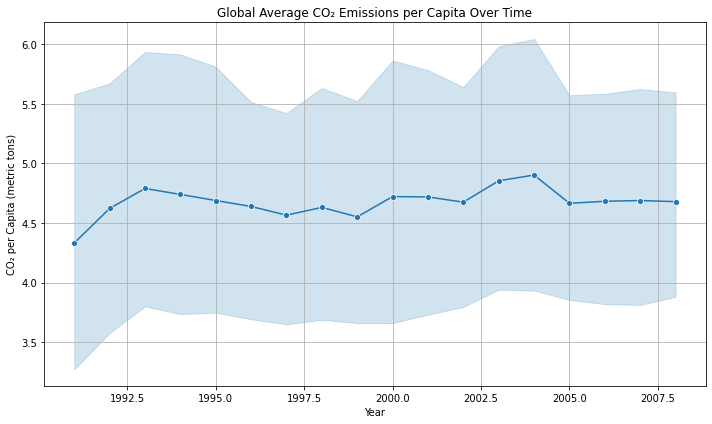

In [8]:
# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

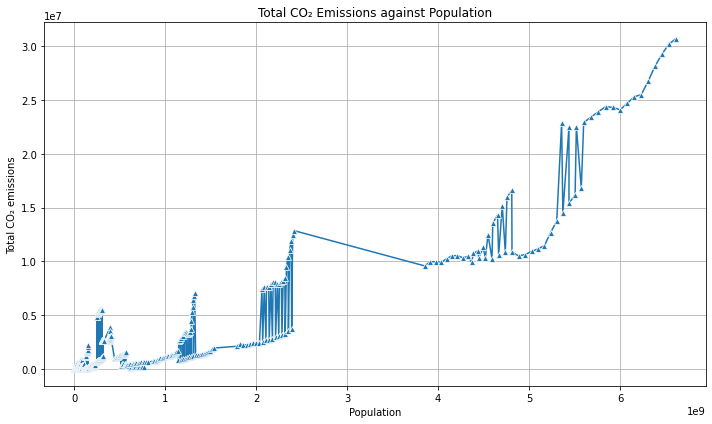

In [9]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

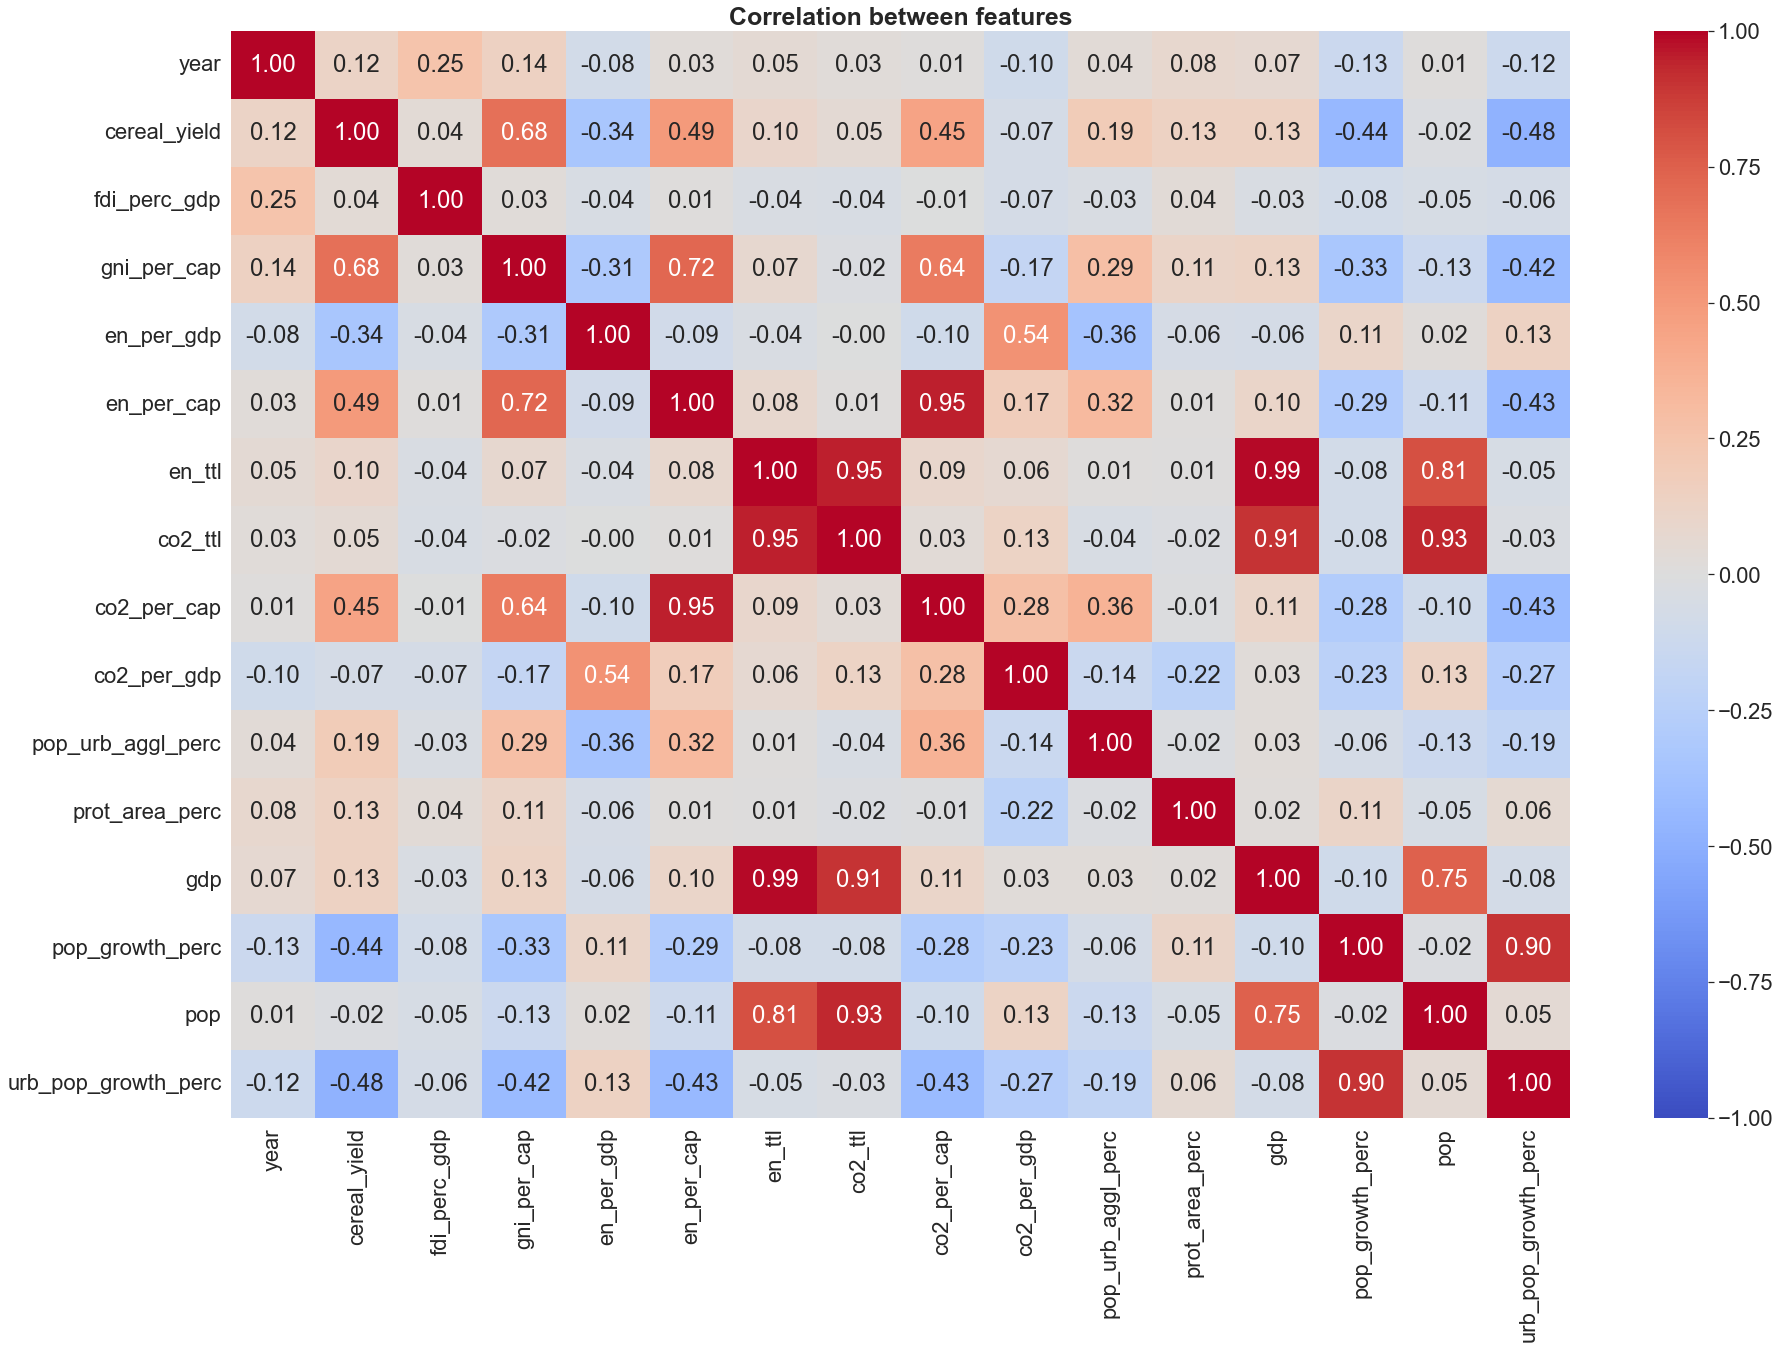

In [11]:
# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
# correlation matrix
sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f", 
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)

In [12]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns # Use the columns from the features_for_vif DataFrame
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])] # Use the values and number of columns from features_for_vif
print(vif_data)

               feature        VIF
0         cereal_yield   1.528029
1         fdi_perc_gdp   0.971430
2          gni_per_cap   2.910934
3           en_per_cap  12.580294
4          co2_per_cap  10.762446
5    pop_urb_aggl_perc   0.979844
6       prot_area_perc   1.022308
7                  gdp   1.106503
8      pop_growth_perc   6.338894
9  urb_pop_growth_perc   5.810870


In [13]:
features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

In [14]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

In [15]:
# get unique values in country column

unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BGD', 'BGR', 'BLR',
       'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECA', 'ECU',
       'EGY', 'EMU', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR', 'GHA', 'GRC',
       'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KOR', 'LAC', 'LIC', 'LMC', 'LMY',
       'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA', 'NLD', 'NZL',
       'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROM', 'RUS',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR', 'TGO',
       'THA', 'TUR', 'TZA', 'UKR', 'UMC', 'URY', 'USA', 'UZB', 'VEN',
       'VNM', 'WLD', 'YEM', 'ZAF', 'ZAR', 'ZMB'], dtype=object)

C:\Users\SANTPAL\AppData\Local\Temp\ipykernel_8784\2805705593.py:16: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SANTPAL\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


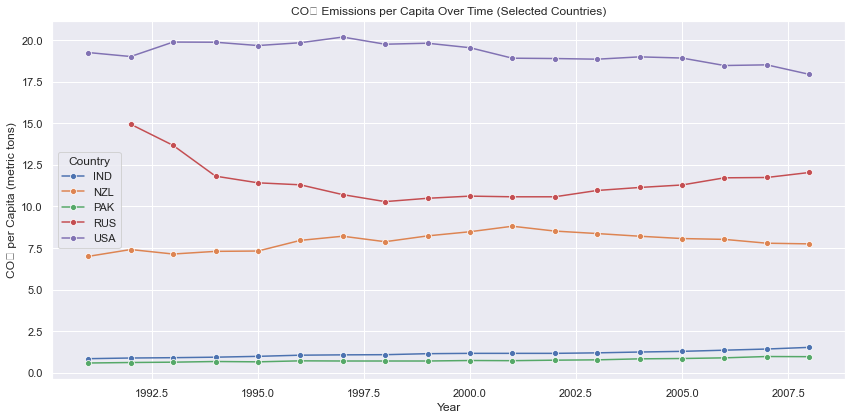

In [16]:
# Select countries to compare
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']

# Use the correct DataFrame variable 'data' and column names 'country', 'year', and 'co2_per_cap'
df_selected = data[data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
# Use the correct DataFrame variable 'df_selected' and column names 'year' and 'co2_per_cap' for plotting
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

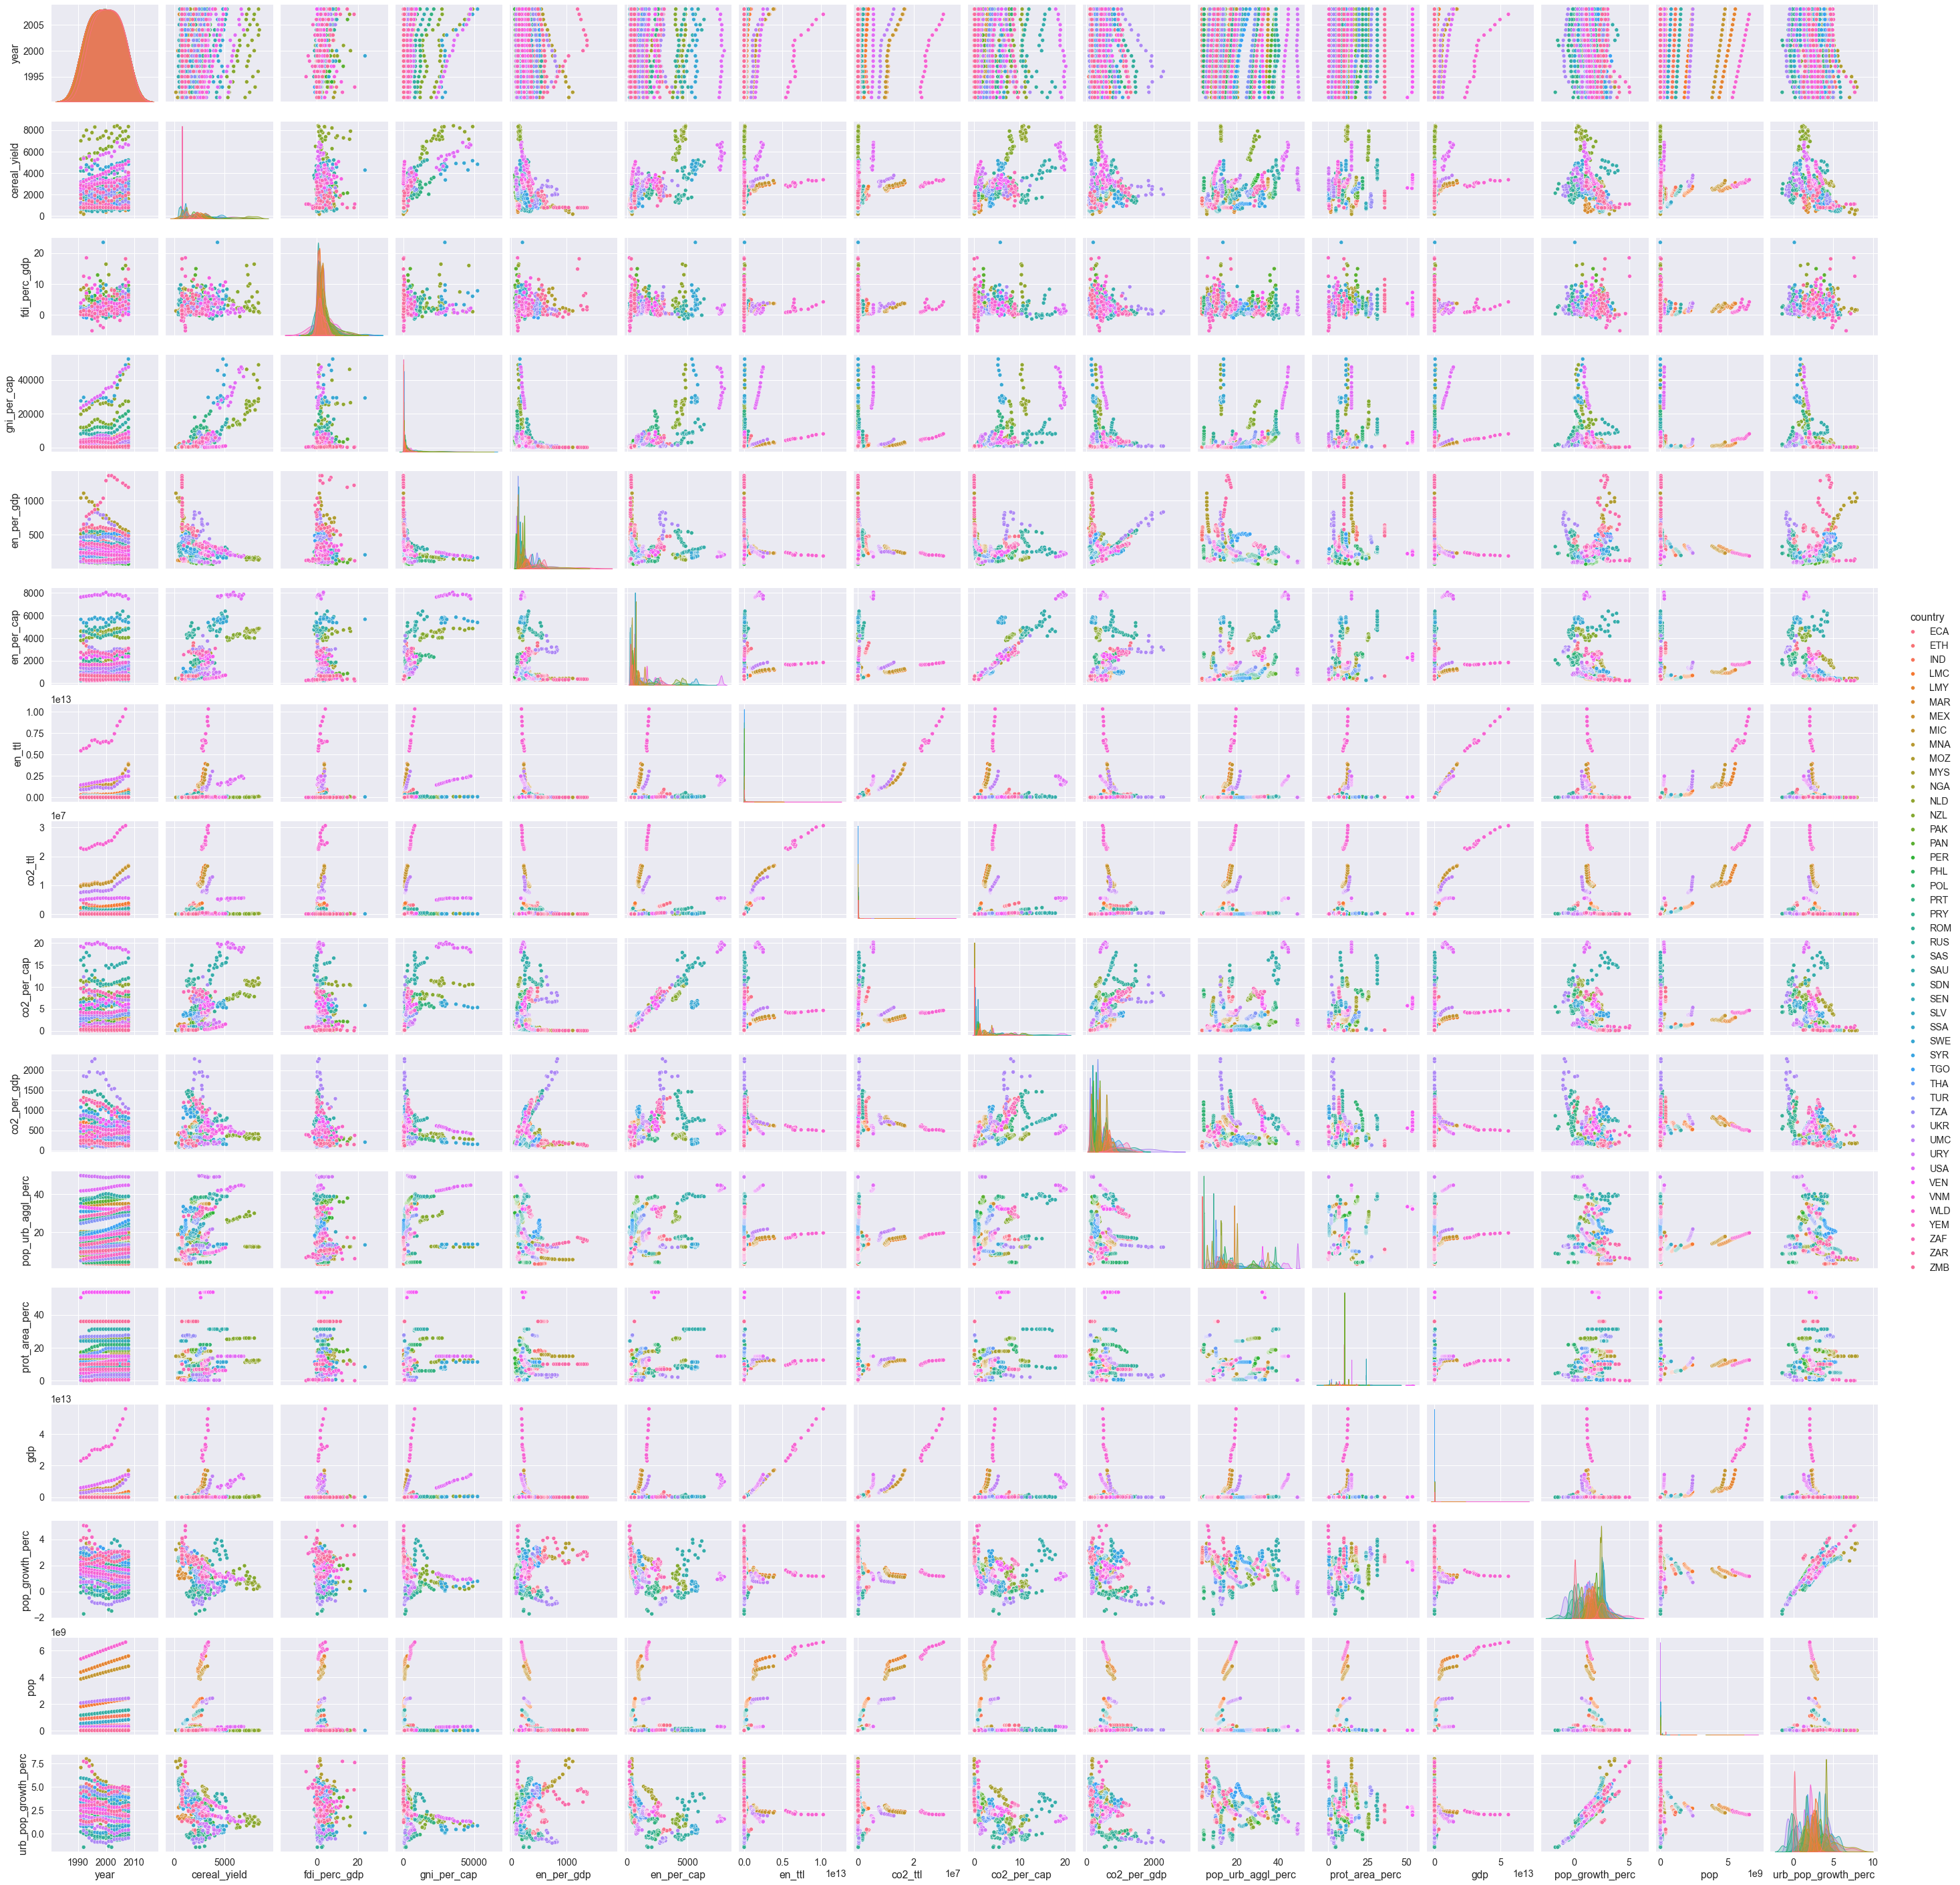

In [18]:
sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

In [19]:
# choose features and label columns
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

# Keep as DataFrame for filtering
features_for_plot = data[feature_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# remove the ARE outliers from the DataFrame used for plotting
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

Text(78.37033880208332, 0.5, 'CO2 emissions per capita [t]')

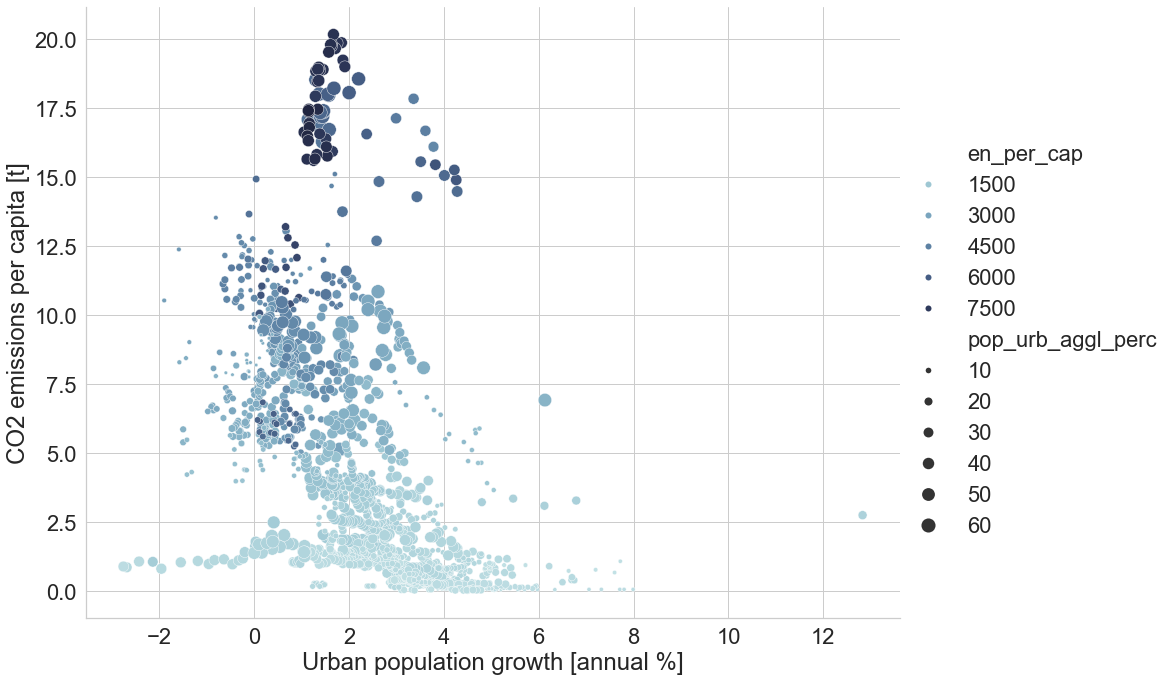

In [20]:
# 4d plot

sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot, # Use the DataFrame specifically prepared for plotting
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])